In [1]:
import random

# HillClimber Class defines a hillclimber algorithm
class HillClimber:
    def __init__(self, mutation):
        # Mutation rate passed into function by parameter
        self.mutation = mutation
        # Capacity limit set to 20
        self.cap = 20
        # Items are setup, with their name, benefit and volume
        self.items = [["a",5,3],["b",6,2],["c",1,4],["d",9,5],["e",2,8],["f",8,9],["g",4,10],["h",3,1],["i",7,6],["j",10,7]]
        # Genes setup and starting values are randomly generated
        self.genes = [random.randrange(2) for i in range(10)]
    
    # Mutate function deals with mutating a gene
    def mutate(self):
        # Makes a copy of genotype
        child = self.genes.copy()
        # Generate a random number between 0-9
        a = random.randrange(10)
        # If number is less than mutation rate
        # This allows me to control the chance of mutation
        # If mutation is set to 2, then 20% chance
        if(a < self.mutation):
            # Flip selected gene
            if(child[a] == 0):
                child[a] = 1
            else:
                child[a] = 0
            # Check fitness of new genotype compared to old genotype
            if(self.fitness(child) > self.fitness(self.genes)):
                # If new genotype is better, set to be main genotype
                self.genes = child
    
    # Checks how good of a solution a set of genes is
    def fitness(self, genes):
        # Initalise benefit and volume variables
        benefit = 0
        volume = 0
        # Go through all 10 genes
        for i in range(10):
            # Check gene to see if item is in knapsack
            if(genes[i] == 1):
                # Add benefit and volume to variable respectively
                benefit += self.items[i][1]
                volume += self.items[i][2]
        
        # If total volume of items in knapsack doesn't exceeds limit
        if(volume <= self.cap):
            # return total benefit
            return benefit
        # If capacity is exceeded, return 0
        else:
            return 0
    
    # Function used to run the algorithm
    def run(self, loops):
        values = []
        # Runs each generation
        # Runs 'loops' amount of generations 
        for i in range(loops):
            # mutates
            self.mutate()
            # adds fitness value to array
            values.append(self.fitness(self.genes))
        # Returns all fitness values
        return values

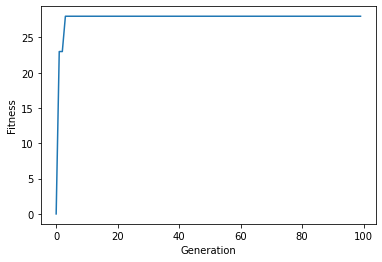

In [9]:
import matplotlib.pyplot as plt

# HillClimber with mutation rate of 2
a = HillClimber(20)
# Run 100 generations
values = a.run(100)
plt.plot(values)
plt.ylabel("Fitness")
plt.xlabel("Generation")
plt.savefig('singleHillClimber.png')
plt.show()

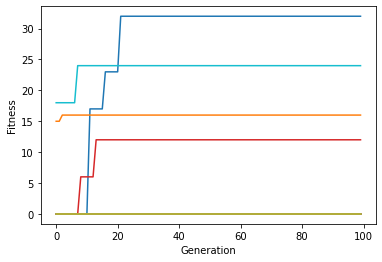

In [3]:
# Run 10 different hillclimbers
for i in range(10):
    # HillClimber with mutation rate of 2
    a = HillClimber(5)
    # Run 100 generations
    values = a.run(100)
    plt.plot(values)
plt.ylabel("Fitness")
plt.xlabel("Generation")
plt.savefig('multipleHillClimber.png')
plt.show()

In [4]:
import random

# Implementation of a microbial genetic algorithm
class MicrobialGA:
    def __init__(self, mutation, crossover,  size, k):
        # Declare the 10 items with names, benefits and volume
        self.items = [["a",5,3],["b",6,2],["c",1,4],["d",9,5],["e",2,8],["f",8,9],["g",4,10],["h",3,1],["i",7,6],["j",10,7]]
        # Set the maximum capacity of knapsack to 20
        self.cap = 20
        # Initalise variable using parameters
        self.k = k
        self.mutation = mutation
        # Crossover rate is multipled by 100 to be in correct format
        self.crossover = 100 * crossover
        self.size = size
        # Create and generate a population of random individuals
        self.population = []
        for i in range(self.size):
            self.population += [[random.randrange(2) for i in range(10)]]
            
    # Mutate function deals with mutating a gene
    def mutate(self, position):
        # Makes a copy of individuals genotype
        child = self.population[position].copy()
        # Generate a random number between 0-9
        a = random.randrange(10)
        # If number is less than mutation rate
        # This allows me to control the chance of mutation
        # If mutation is set to 2, then 20% chance
        if(a < self.mutation):
            # Flip selected gene
            if(child[a] == 0):
                child[a] = 1
            else:
                child[a] = 0
            # Check fitness of new genotype compared to individuals genotype
            if(self.fitness(child) > self.fitness(self.population[position])):
                # If new genotype is better, set to be this individuals genotype
                self.population[position] = child
    
    # Checks how good of a solution a set of genes is
    def fitness(self, genes):
        # Initalise benefit and volume variables
        benefit = 0
        volume = 0
        # Go through all 10 genes
        for i in range(10):
            # Check gene to see if item is in knapsack
            if(genes[i] == 1):
                # Add benefit and volume to variable respectively
                benefit += self.items[i][1]
                volume += self.items[i][2]
        
        # If total volume of items in knapsack doesn't exceeds limit
        if(volume <= self.cap):
            # return total benefit
            return benefit
        # If capacity is exceeded, return 0
        else:
            return 0

    # Compare function deals with comparing solutions and winner/loser process
    def compare(self):
        # Pick a random individual
        x1 = random.randrange(self.size)
        # Randomly pick add or minus
        x = random.randrange(2)
        # Picks a neighbour of x1 from population
        if(x == 0):
            x2 = x1 + random.randrange(self.k) + 1
            if(x2 > (self.size - 1)):
                x2 = self.size - 1
        else:
            x2 = x1 - random.randrange(self.k) - 1
            if(x2 < 0):
                x2 = 0
        
        # Compares fitness of individuals x1 and x2
        if(self.fitness(self.population[x1]) > self.fitness(self.population[x2])):
            # Loser takes genes from Winner
            for i in range(10):
                # Each gene has a chance to be taken depending on crossover rate
                temp = random.randrange(100)
                if(temp < self.crossover):
                    # If crossover rate test passed, takes gene from winner
                    self.population[x2][i] = self.population[x1][i]
            # Mutate loser after taking the genes
            self.mutate(x2)
        else:
            # Loser takes genes from Winner
            for i in range(10):
                # Each gene has a chance to be taken depending on crossover rate
                # If crossover = 50 then 50% chance of taking a gene each time
                temp = random.randrange(100)
                if(temp < self.crossover):
                    # If crossover rate test passed, takes gene from winner
                    self.population[x1][i] = self.population[x2][i]
            # Mutate loser after taking the genes
            self.mutate(x1)
    
    # Function to run comparison process
    def run(self, loops):
        values = []
        for i in range(loops):
            # Compares two individuals, declares winner and loser
            # Loser takes some genes and mutates
            self.compare()
            temp = 0
            for i in range(self.size):
                # Adds all fitness of all individuals together
                temp += (self.fitness(self.population[i]))
            # Gets the average of all fitnesses
            temp = temp / self.size
            # Adds average fitness of population to values
            values.append(temp)
        # Returns average fitness of population in each generation
        return values
        

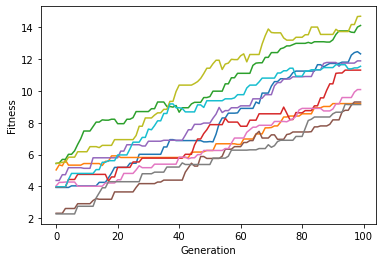

In [5]:
import matplotlib.pyplot as plt

for i in range(10):
    ## MicrobialGA(mutation rate, crossover rate, size, k)
    # Muation rate of 50%, crossover rate of 50%, population size of 50 and k of 2
    y = MicrobialGA(0.5, 0.5, 50, 2)
    # Run 100 generations
    values = y.run(100)
    plt.plot(values)
plt.ylabel("Fitness")
plt.xlabel("Generation")
plt.savefig('singleGA.png')
plt.show()